In [3]:
import sys
sys.path.append('./src')

import io_utils
import metrics

df = io_utils.get_df()

#df.info()
#df.head()

Top 3 kategorier baserat på omsättning:
category
Electronics    1364228.07
Sports          734653.42
Clothing        586744.91
Name: revenue, dtype: float64

Total omsättning: 3502767.2300000004 (avrundad till 3503000)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   order_id  2500 non-null   int64  
 1   date      2500 non-null   object 
 2   city      2500 non-null   object 
 3   category  2500 non-null   object 
 4   price     2500 non-null   float64
 5   units     2500 non-null   int64  
 6   revenue   2500 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 136.8+ KB


### 1. Vad säljer vi? – vilka kategorier driver mest intäkt?
- Kategorier 'Electronics', 'Sports' respektive ' Clothing' driver mest intäkt.

In [ ]:
from metrics import unique_products, category_revenue

print(f"Vi säljer följande unika kategorier: \n {unique_products}")

print(f"\nIntäkt per kategori: \n {category_revenue}")

Vi säljer följande unika kategorier: 
 ['Sports' 'Clothing' 'Home' 'Electronics' 'Toys' 'Beauty']

Intäkt per kategori: 
 category
Electronics    1364228.07
Sports          734653.42
Clothing        586744.91
Home            511070.87
Beauty          163053.97
Toys            143015.99
Name: revenue, dtype: float64


In [ ]:
import matplotlib.pyplot as plt


fig, ax =plt.subplots()
category_revenue.plot(kind="bar", ax=ax)
ax.set_title("Intäkt per kategorie")
ax.set_xlabel("Kategorie")
ax.set_ylabel("Intäkt")
ax.grid(True, axis='y')
plt.tight_layout()
plt.show()

### 2. Var säljer vi? – vilka städer står för störst intäkt?
- Stockholm, Göteborg respektive Malmö står för störst intakt.

In [ ]:
from metrics import units_per_city, top_cities, category_per_city
top_cities # sum of revenue per city

In [ ]:
units_per_city #sum of units per category and city

In [ ]:
category_per_city #sum of revenue per category and city.

In [ ]:
fig, ax = plt.subplots()
category_per_city.plot(kind='bar', ax=ax)
ax.set_title("Intäkter per stad och kategori")
ax.set_xlabel("Stad")
ax.set_ylabel("Intäkt")
ax.grid(True, axis='y')
plt.tight_layout()
plt.show()

### 3. När säljer vi? – finns tidsmönster/säsong i försäljningen?
- Vi säljer mest i januari och maj.

In [ ]:
from metrics import revenue_by_month, revenue_by_day_of_month

revenue_by_month # Shows the total revenue for the different months


In [ ]:
revenue_by_day_of_month # Shows the best selling days of the months

In [ ]:
import matplotlib.pyplot as plt

plt.plot(revenue_by_month.index, revenue_by_month.values)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Revenue by month")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.bar(revenue_by_day_of_month.index, revenue_by_day_of_month.values)
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.title("Best selling days of the months")
plt.grid(True)
plt.tight_layout()
plt.show()

### 4. Hur ser en typisk order ut? – AOV (Average Order Value) och spridning.
- Genomsnittligt ordervärde: 1401 kr.

In [ ]:
from metrics import average_order
average_order(df);


#Distribution of order values
#fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={"height_ratios":[4,1]})

#ax_hist.hist(df["revenue"], bins=50, edgecolor = "black")
#ax_hist.set_title("Spridning av ordervärden")

#ax_hist.set_ylabel("Antal ordrar")
#ax_hist.grid(True, axis="y")

#ax_box.boxplot(df["revenue"], vert=False)
#ax_box.set_xlabel("Ordervärde (kr)")
#ax_box.set_yticklabels("")
#ax_box.grid(True, axis="x")

#plt.tight_layout()



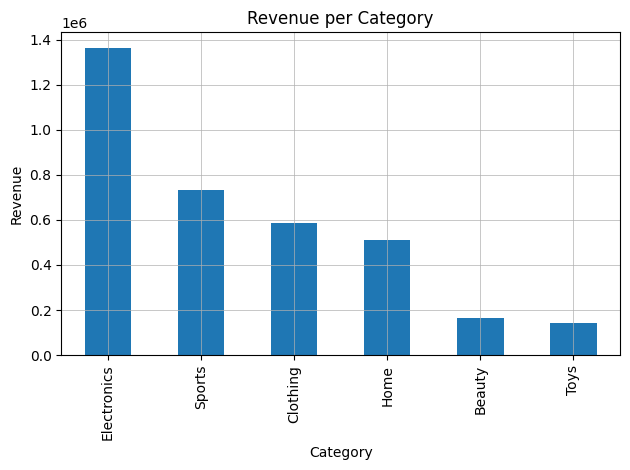

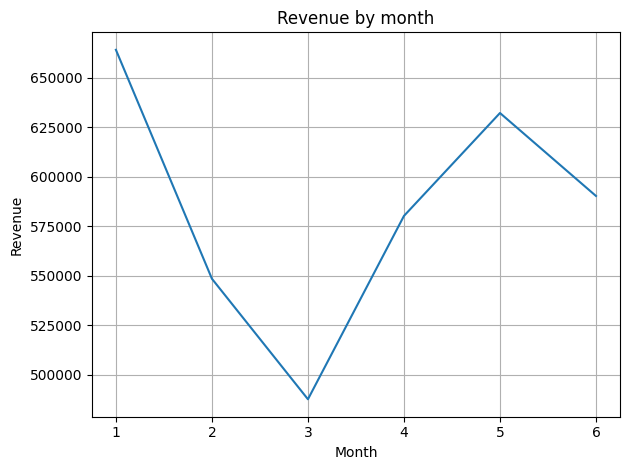

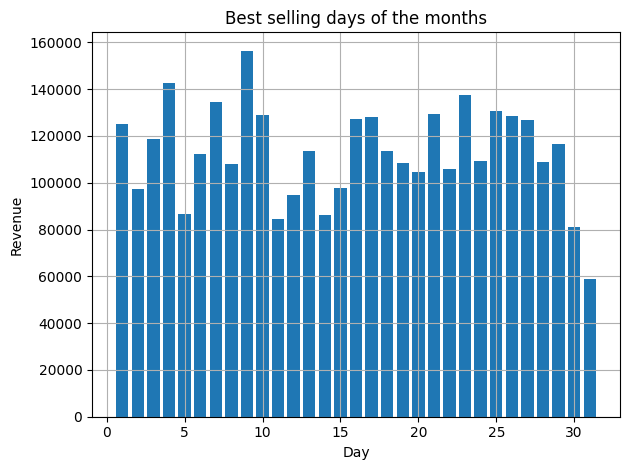

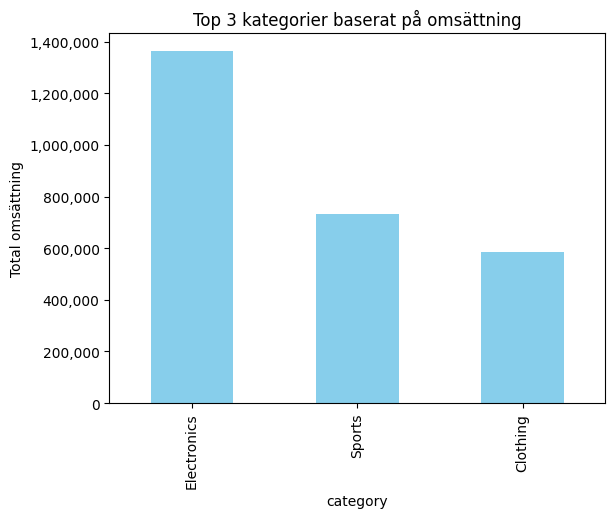

C:\Users\iidac\AppData\Local\Temp\ipykernel_13776\3997254444.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


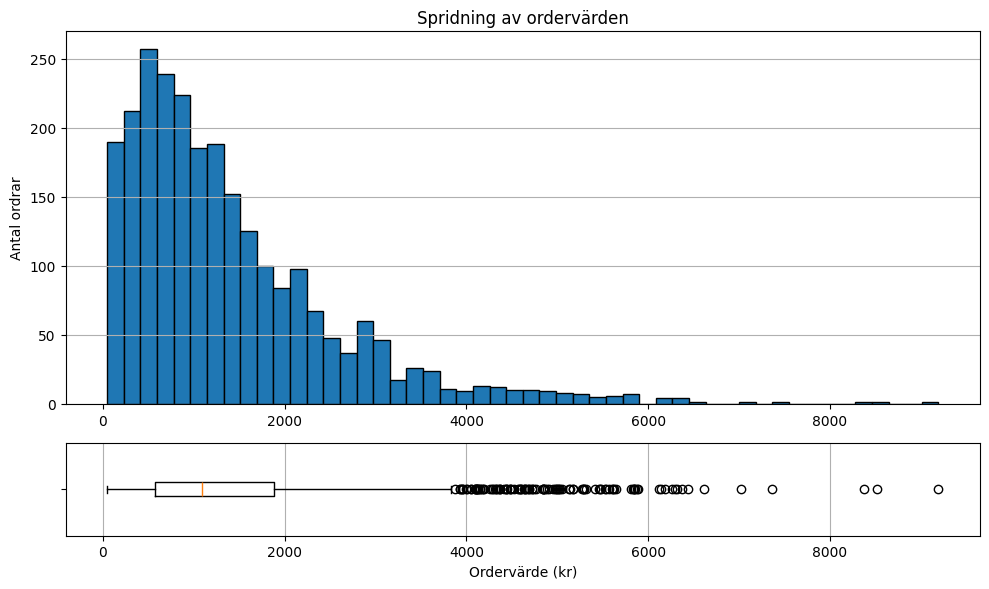

In [15]:
from src import viz as V

fig = V.order_distribution(df)
fig.show()

### 5. Topp-listor – topp-3 kategorier efter intäkt.

- **Topp-kategorier:** 1. Electronics, 2. Sports, 3. Clothing.

In [ ]:
import numpy as np

# Summera intäkt per kategori
kategori_sum = df.groupby("category")["revenue"].sum()

# Plocka fram topp 3
top3 = kategori_sum.nlargest(3)

# Totala intäkten (avrundad uppåt till närmaste 500, med min 1000)
total = kategori_sum.sum()
total_rounded = max(1000, int(np.ceil(total / 500.0) * 500))

print("Top 3 kategorier baserat på omsättning:")
print(top3)
print(f"\nTotal omsättning: {total} (avrundad till {total_rounded})")

### 6. Eventuella avvikelser – något oväntat mönster som sticker ut?


### Slutsatser och rekommendationer:

- **Topp-kategorier:** 1. Electronics, 2. Sports, 3. Clothing
- **Topp-städer:** 1. Stockholm, 2. Göteborg, 3. Malmö
- **Säsongstopp:** Januari

- Satsa på kategori 'Electronics' i Stockholm under januari.
- Undersök varför vi säljer sämre i mars och i Västerås.
- Undersök varför kategorierna 'Toys' och 'Beauty' säljer sämre.